In [ ]:
# import libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

import altair as alt
from vega_datasets import data

### Load Data

In [2]:
df_subs = pd.read_csv('subscriptions.csv')

In [3]:
df_subs.head()

,Date,Disney+,ESPN+,Hulu,Peacock,Apple TV+,HBO Max,Netflix,CBS All Access,Starz,Amazon
0,9/28/2019,NaN,3500000.0,28500000.0,NaN,NaN,NaN,167090000.0,10400000.0,7700000.0,142000000.0
1,10/5/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/19/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/26/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Explore Data

In [4]:
df_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            66 non-null     object 
 1   Disney+         11 non-null     float64
 2   ESPN+           6 non-null      float64
 3   Hulu            6 non-null      float64
 4   Peacock         5 non-null      float64
 5   Apple TV+       3 non-null      float64
 6   HBO Max         3 non-null      float64
 7   Netflix         5 non-null      float64
 8   CBS All Access  6 non-null      float64
 9   Starz           6 non-null      float64
 10  Amazon          4 non-null      float64
dtypes: float64(10), object(1)
memory usage: 5.8+ KB


In [5]:
# notes 
# date is an object
# 66 rows, but most data is null

In [6]:
# convert to datetime
df_subs['Date'] = pd.to_datetime(df_subs['Date'])

In [7]:
# fill missing data using linear interpolation, limit to inside existing values
df_subs = df_subs.interpolate(method ='linear', limit_direction ='both', limit_area='inside') 

In [8]:
df_subs.head()

,Date,Disney+,ESPN+,Hulu,Peacock,Apple TV+,HBO Max,Netflix,CBS All Access,Starz,Amazon
0,2019-09-28,NaN,3.500000e+06,2.850000e+07,NaN,NaN,NaN,1.670900e+08,1.040000e+07,7.700000e+06,1.420000e+08
1,2019-10-05,NaN,3.738462e+06,2.864615e+07,NaN,NaN,NaN,1.676965e+08,1.046154e+07,7.769231e+06,1.424444e+08
2,2019-10-12,NaN,3.976923e+06,2.879231e+07,NaN,NaN,NaN,1.683031e+08,1.052308e+07,7.838462e+06,1.428889e+08
3,2019-10-19,NaN,4.215385e+06,2.893846e+07,NaN,NaN,NaN,1.689096e+08,1.058462e+07,7.907692e+06,1.433333e+08
4,2019-10-26,NaN,4.453846e+06,2.908462e+07,NaN,NaN,NaN,1.695162e+08,1.064615e+07,7.976923e+06,1.437778e+08


In [9]:
# Disney+, Peacock, Apple TV+, HBO Max are Null initially because they haven't launched yet

In [10]:
# convert data from wide format to narrow
df_melt = pd.melt(df_subs, id_vars='Date', var_name ='company', value_name ='subscribers')

In [11]:
df_melt

,Date,company,subscribers
0,2019-09-28,Disney+,NaN
1,2019-10-05,Disney+,NaN
2,2019-10-12,Disney+,NaN
3,2019-10-19,Disney+,NaN
4,2019-10-26,Disney+,NaN
...,...,...,...
655,2020-11-28,Amazon,1.632692e+08
656,2020-12-05,Amazon,1.635769e+08
657,2020-12-12,Amazon,1.638846e+08
658,2020-12-19,Amazon,1.641923e+08


In [12]:
# now 660 rows and only 3 columns

### Visualizations

#### Line Chart

In [13]:
# line chart

alt.Chart(df_melt).mark_line().encode(
  x='Date:T',
  y='subscribers:Q',
  color='company:N'
)

alt.Chart(...)

#### Area Chart

In [14]:
# Area Chart
alt.Chart(df_melt).mark_area().encode(
  x='Date:T',
  y='subscribers:Q',
  color='company:N'
)

alt.Chart(...)

#### Steam Graph

In [15]:
# Steam Graph

alt.Chart(df_melt).mark_area().encode(
    alt.X('Date:T', timeUnit='yearmonthdate',
      axis=alt.Axis(format='%m%Y', labelAngle=0, title='month')),
    alt.Y('sum(subscribers):Q',
        stack='center'
    ),
    color=alt.Color('company:N', scale=alt.Scale(scheme="category20b"))
)

alt.Chart(...)

#### Bar Chart

In [16]:
# New Dataframe based off last week in existing df
df_eoy = df_melt[df_melt['Date'] >= '2020-12-26']

In [17]:
df_eoy

,Date,company,subscribers
65,2020-12-26,Disney+,92625000.0
131,2020-12-26,ESPN+,12100000.0
197,2020-12-26,Hulu,37700000.0
263,2020-12-26,Peacock,28000000.0
329,2020-12-26,Apple TV+,45600000.0
395,2020-12-26,HBO Max,20000000.0
461,2020-12-26,Netflix,197350000.0
527,2020-12-26,CBS All Access,19600000.0
593,2020-12-26,Starz,16000000.0
659,2020-12-26,Amazon,164500000.0


In [18]:
df_sort = df_eoy.sort_values(by='subscribers', ascending=True)

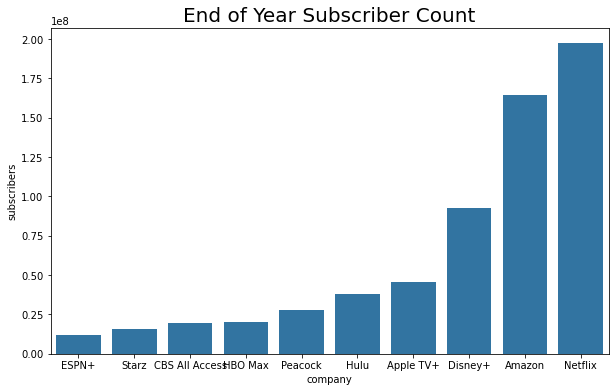

In [19]:
# bar chart for final week
plt.figure(figsize=(10, 6))
sns.barplot(x='company', y='subscribers', data=df_sort, color='tab:blue')
plt.title('End of Year Subscriber Count', fontsize=20)
plt.show()